<a href="https://colab.research.google.com/github/lucasvenicius19/ConversorRGBparaTonsdeCinzaePretoeBranco/blob/main/ConversorRGBparaTonsdeCinzaePretoeBranco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
# Importando as bibliotecas necessárias
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [167]:
# Carrega a imagem a partir do caminho
def load_image(image_path):
  return Image.open(image_path)

In [168]:
# Exibe as imagens com seus títulos
def display_image(image, title):
  plt.imshow(image, cmap="gray")
  plt.title(title)
  plt.show()

In [169]:
# convertendo a imagem original para tons de cinza
def rgb_to_gray(image_array):
  height, width, _ = image_array.shape
  gray_array = np.zeros((height, width), dtype = np.uint8)

  for i in range(height):
    for j in range(width):
      r, g, b = image_array[i, j]
      gray_value = int(0.2989*r + 0.5870*g + 0.1140*b)
      gray_array[i, j] = gray_value

  return gray_array

In [170]:
# Criando a imagem em tons de cinza a partir da matriz em tons de cinza
def create_gray_image(gray_array):
  return Image.fromarray(gray_array, mode='L')

In [171]:
def apply_threshold(gray_array, threshold=110):
  bw_array = np.zeros_like(gray_array, dtype=np.uint8)
  bw_array[gray_array < threshold] = 0
  bw_array[gray_array >= threshold] = 255
  return bw_array

In [172]:
# Criando a imagem em preto e branco a partir de uma matriz binária
def create_bw_image(bw_array):
  return Image.fromarray(bw_array, mode='L')

In [173]:
#Salvando as imagens
def save_image(image, path):
  image.save(path)

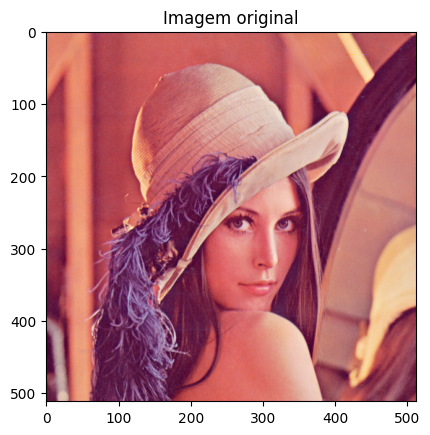

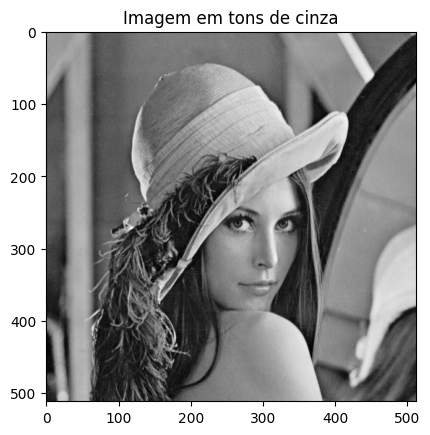

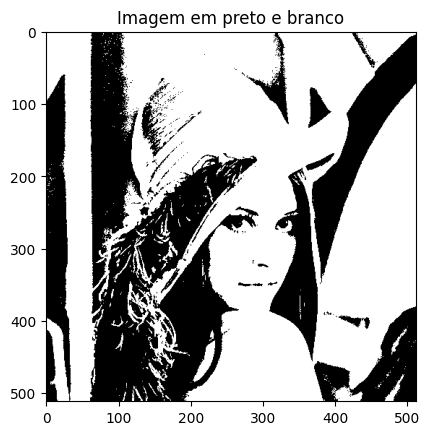

In [174]:
if __name__ == "__main__":
  #caminho da imagem
  image_path = "/content/lena_teste_imagem.png"
  #carrega a imagem original
  original_image = load_image(image_path)
  display_image(original_image, "Imagem original")
  # convertendo a imagem original para uma matriz do numpy
  original_array = np.array(original_image)
  #convertendo a imagem para tons de cinza
  gray_array = rgb_to_gray(original_array)
  gray_image = create_gray_image(gray_array)
  display_image(gray_image, "Imagem em tons de cinza")

  threshold = 110
  bw_array = apply_threshold(gray_array, threshold)
  bw_image = create_bw_image(bw_array)
  display_image(bw_image, "Imagem em preto e branco")

  gray_image.save('/content/lena_gray_image.png')
  bw_image.save('/content/lena_bw_image.png')